In [2]:
import pandas as pd
import numpy as np

import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
har_data = pd.read_parquet('data/train_data.parquet')
body_acc_x = pd.read_csv('data/train/body_acc_x_train.txt', sep='\s+', header=None)
body_acc_y = pd.read_csv('data/train/body_acc_y_train.txt', sep='\s+', header=None)
body_acc_z = pd.read_csv('data/train/body_acc_z_train.txt', sep='\s+', header=None)

body_gyro_x = pd.read_csv('data/train/body_gyro_x_train.txt', sep='\s+', header=None)
body_gyro_y = pd.read_csv('data/train/body_gyro_y_train.txt', sep='\s+', header=None)
body_gyro_z = pd.read_csv('data/train/body_gyro_z_train.txt', sep='\s+', header=None)

y_train = pd.read_csv('data/train/y_train.txt', sep='\s+', header=None)

y_train_labels = pd.read_csv('data/activity_labels.txt', delim_whitespace=True, header=None)
y_train_labels = y_train_labels[1].tolist()
y_train[0] = y_train[0].map(lambda x: y_train_labels[x-1])

body_acc_x["activity"] = y_train
body_acc_y["activity"] = y_train
body_acc_z["activity"] = y_train

body_gyro_x["activity"] = y_train
body_gyro_y["activity"] = y_train
body_gyro_z["activity"] = y_train

In [4]:
har_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
body_acc_x.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,activity
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576,STANDING
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599,STANDING
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178,STANDING
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028,STANDING
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328,STANDING


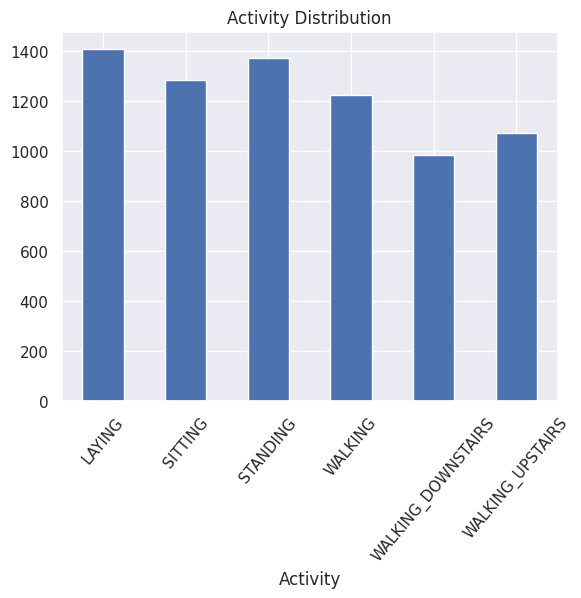

In [6]:
(
    har_data
    .groupby('activity')
    [["activity"]]
    .count()
    .plot(kind="bar", 
          rot=50, 
          legend=False, 
          xlabel="Activity", 
          title="Activity Distribution")
)
plt.show()

Looking at the above graph we see that there's an equal distribution of the target variable in the training set. Except for the 'DOWNSTARIS' and 'UPSTAIRS' classes these are a bit less than the rest.

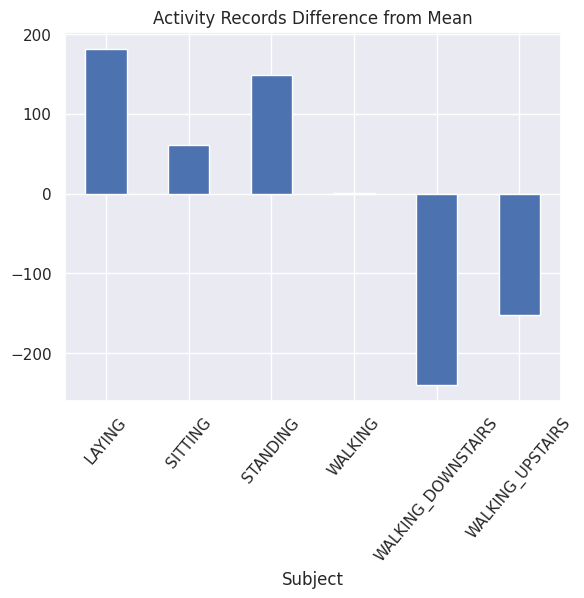

In [7]:
(
    har_data
    .groupby(["activity"])
    [["activity"]]
    .count()
    .apply(lambda x: x - np.mean(x))
    .plot(kind="bar", 
          rot=50, 
          stacked=True, 
          legend=False, 
          xlabel="Subject", 
          title="Activity Records Difference from Mean")
)
plt.show()

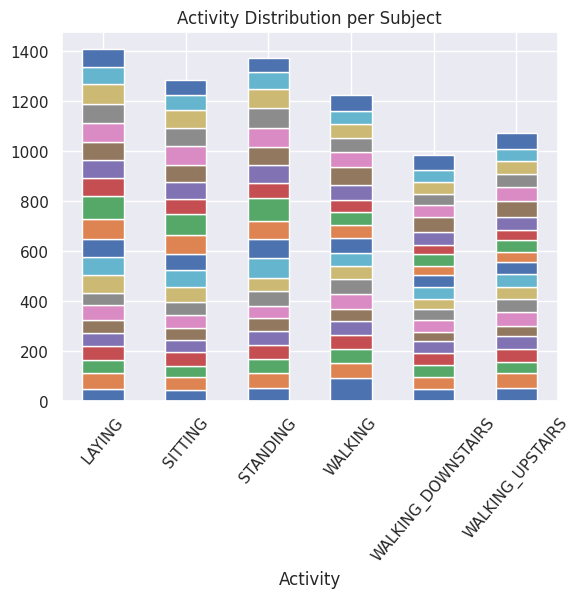

In [8]:
(
    har_data
    .groupby(["activity", "subject"])
    [["activity"]]
    .count()
    .unstack()
    .plot(kind="bar", 
          rot=50, 
          stacked=True, 
          legend=False, 
          xlabel="Activity", 
          title="Activity Distribution per Subject")
)
plt.show()

Now, we looked at the distribution of the activites across the subjects. Here, we wanted to see if a certain activity was dominated by a certain subject. We see that the distribution is pretty even across the subjects. This is good because we don't want our activity to be dominated by a certain subject. This way we can generalize our model better.

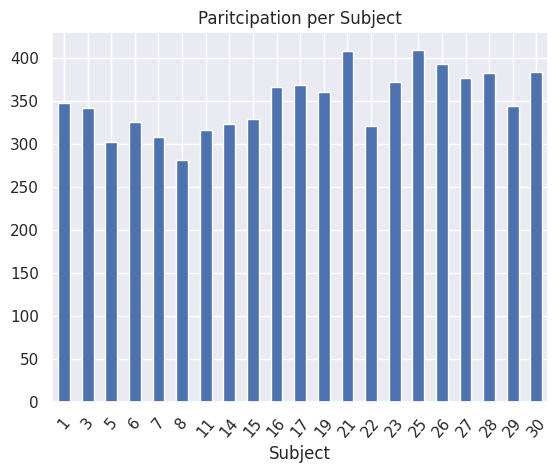

In [9]:
(
    har_data
    .groupby(["subject"])
    [["subject"]]
    .count()
    .plot(kind="bar", 
          rot=50, 
          stacked=True, 
          legend=False, 
          xlabel="Subject", 
          title="Paritcipation per Subject")
)
plt.show()

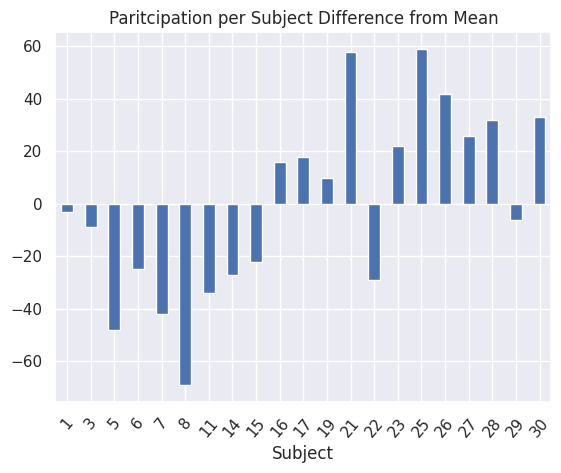

In [10]:
(
    har_data
    .groupby(["subject"])
    [["subject"]]
    .count()
    .apply(lambda x: x - np.mean(x))
    .plot(kind="bar",
          rot=50,
          stacked=True,
          legend=False,
          xlabel="Subject",
          title="Paritcipation per Subject Difference from Mean")
)
plt.show()

The above two graphs gives us an insight about the number of readings from each subject. We see that the number of readings from each subject is not really even. However, we think that it's kinda acceptable as the difference is not that big.

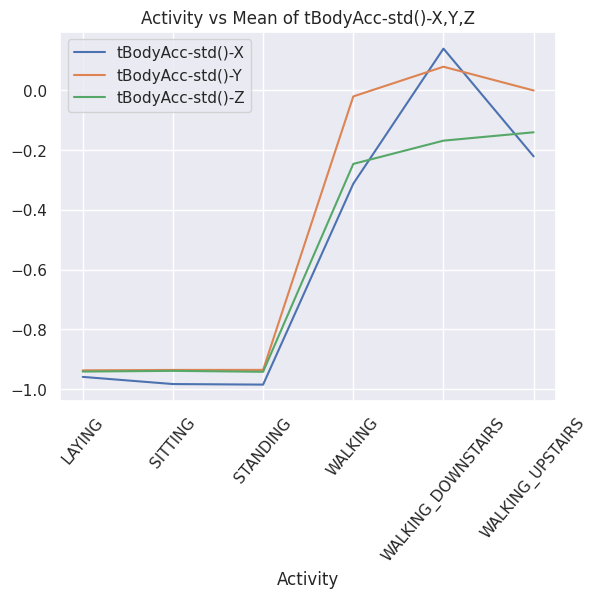

In [11]:
(
    har_data
    .groupby('activity')
    [["activity", 
      "tBodyAcc-std()-X",
      "tBodyAcc-std()-Y",
      "tBodyAcc-std()-Z",]]
    .mean(numeric_only=True)
    .plot(rot=50, 
          xlabel="Activity", 
          title="Activity vs Mean of tBodyAcc-std()-X,Y,Z")
)
plt.show()

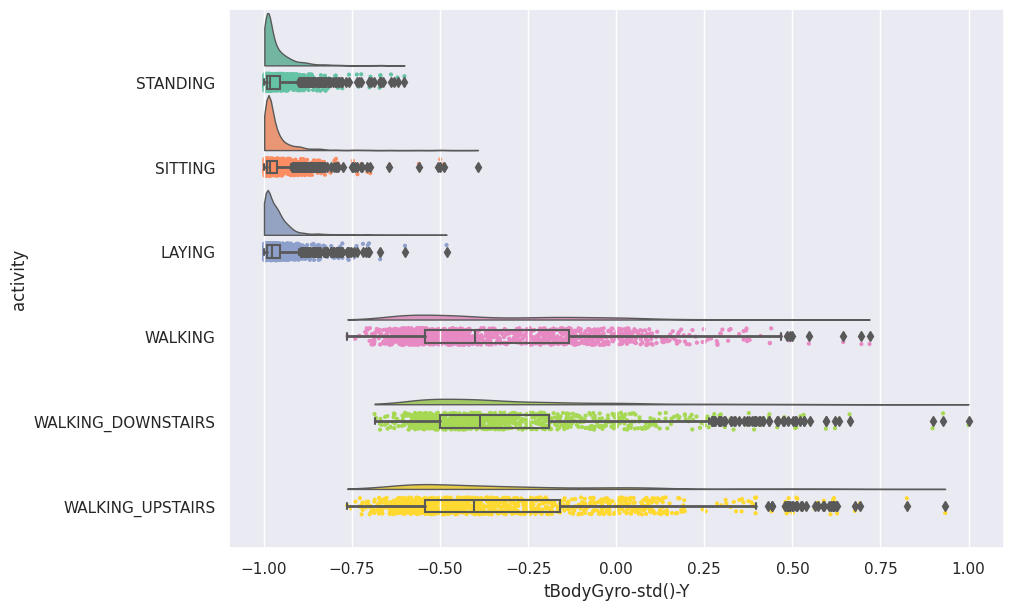

In [12]:
f, ax = plt.subplots(figsize=(10, 7))

pt.RainCloud(data=har_data,
            x='activity',
            y='tBodyGyro-std()-Y',
            orient='h',
            width_viol=1.3,
            ax=ax)
plt.show()

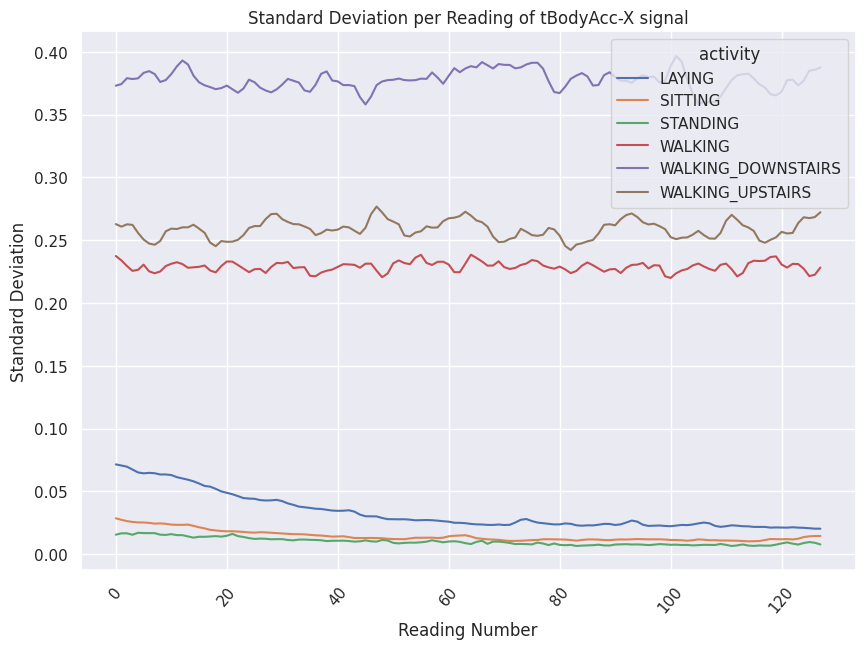

In [13]:
(
    body_acc_x
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["LAYING", "SITTING", "STANDING"]]
    # [["WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS", "WALKING"]]
    .plot(rot=50,
            xlabel="Reading Number",
            ylabel="Standard Deviation",
            figsize=(10, 7),
            title="Standard Deviation per Reading of tBodyAcc-X signal")
)
plt.show()

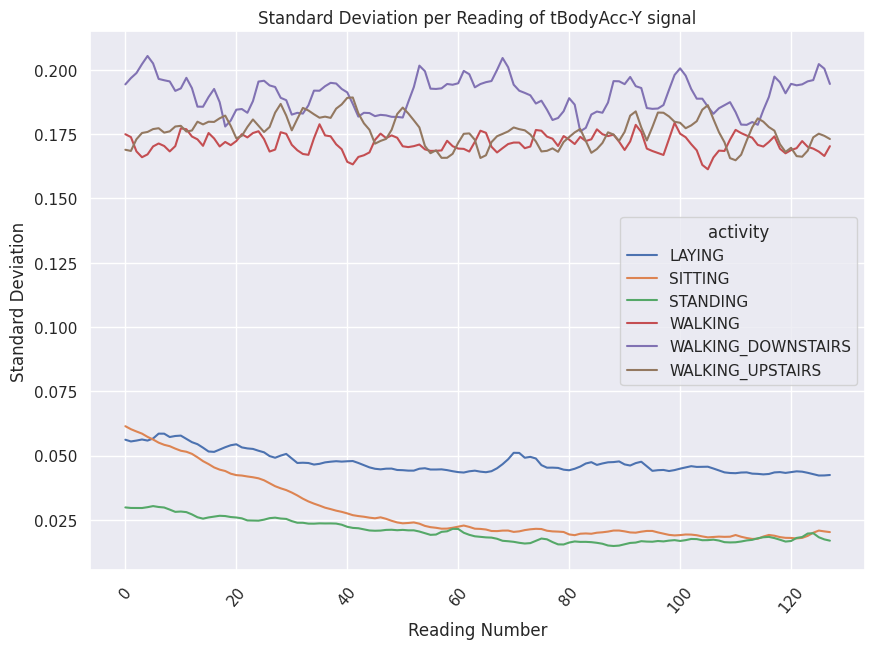

In [14]:
(
    body_acc_y
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["LAYING", "SITTING", "STANDING"]]
    # [["WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS", "WALKING"]]
    .plot(rot=50,
            xlabel="Reading Number",
            ylabel="Standard Deviation",
            figsize=(10, 7),
            title="Standard Deviation per Reading of tBodyAcc-Y signal")
)
plt.show()

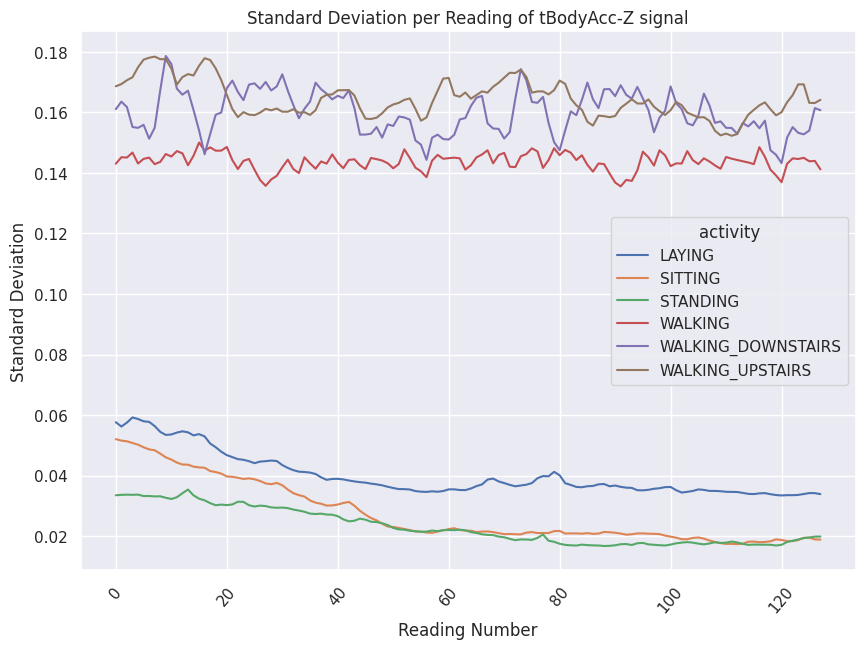

In [15]:
(
    body_acc_z
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["LAYING", "SITTING", "STANDING"]]
    # [["WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS", "WALKING"]]
    .plot(rot=50,
            xlabel="Reading Number",
            ylabel="Standard Deviation",
            figsize=(10, 7),
            title="Standard Deviation per Reading of tBodyAcc-Z signal")
)
plt.show()

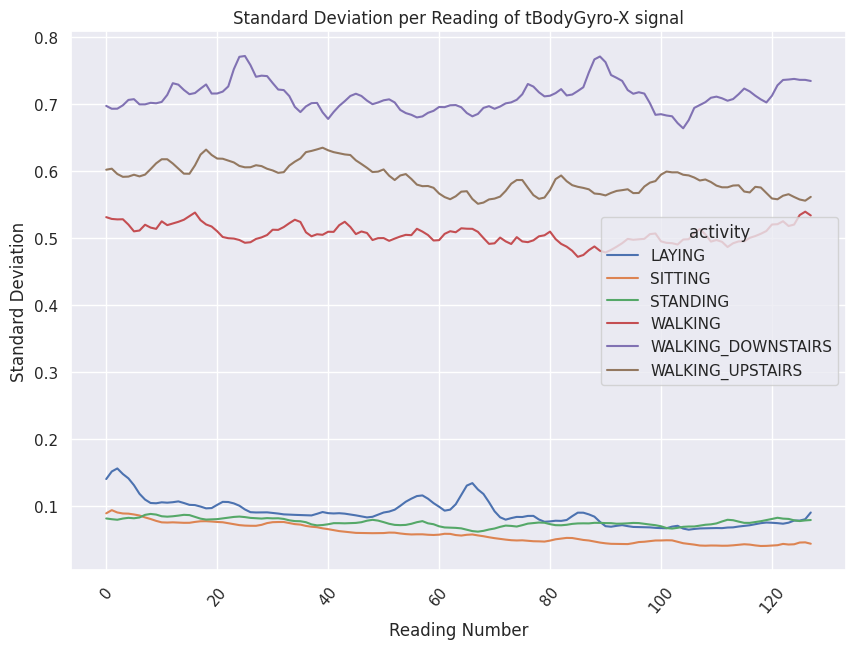

In [16]:
(
    body_gyro_x
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["LAYING", "SITTING", "STANDING"]]
    # [["WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS", "WALKING"]]
    .plot(rot=50,
            xlabel="Reading Number",
            ylabel="Standard Deviation",
            figsize=(10, 7),
            title="Standard Deviation per Reading of tBodyGyro-X signal")
)
plt.show()

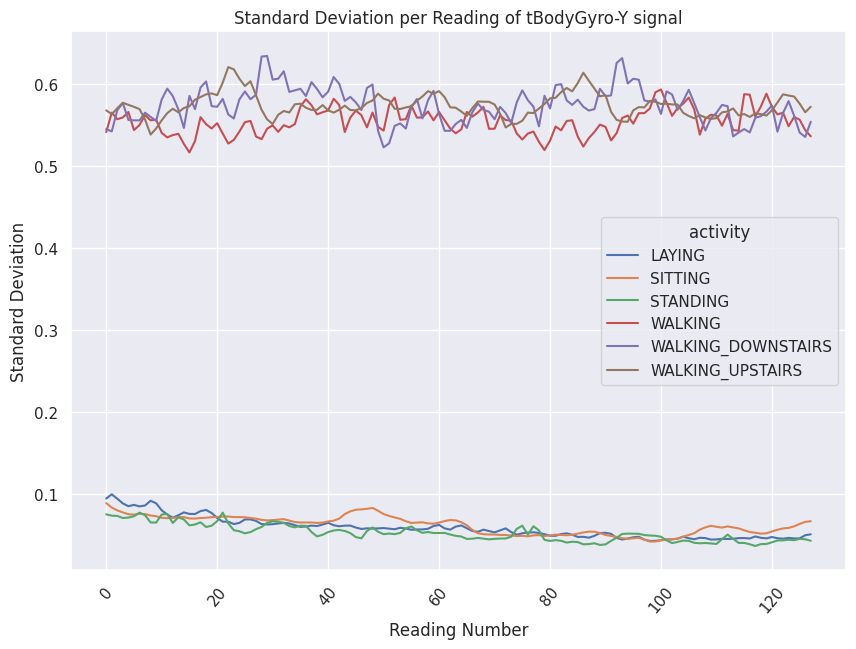

In [17]:
(
    body_gyro_y
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["LAYING", "SITTING", "STANDING"]]
    # [["WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS", "WALKING"]]
    .plot(rot=50,
            xlabel="Reading Number",
            ylabel="Standard Deviation",
            figsize=(10, 7),
            title="Standard Deviation per Reading of tBodyGyro-Y signal")
)
plt.show()

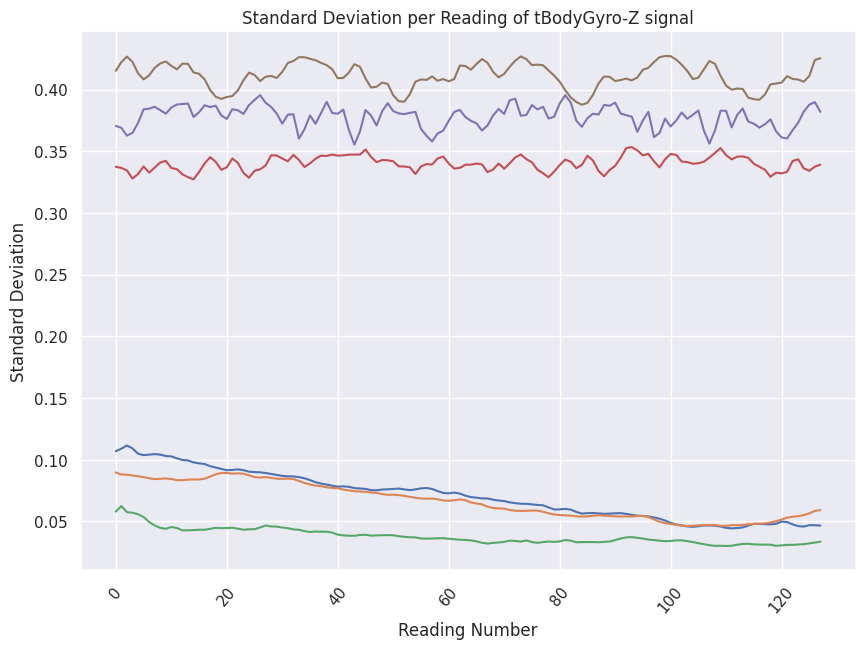

In [18]:
(
    body_gyro_z
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["LAYING", "SITTING", "STANDING"]]
    # [["WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS", "WALKING"]]
    .plot(legend=False,
            xlabel="Reading Number",
            ylabel="Standard Deviation",
            figsize=(10, 7),
            rot=50,
            title="Standard Deviation per Reading of tBodyGyro-Z signal")

)
plt.show()

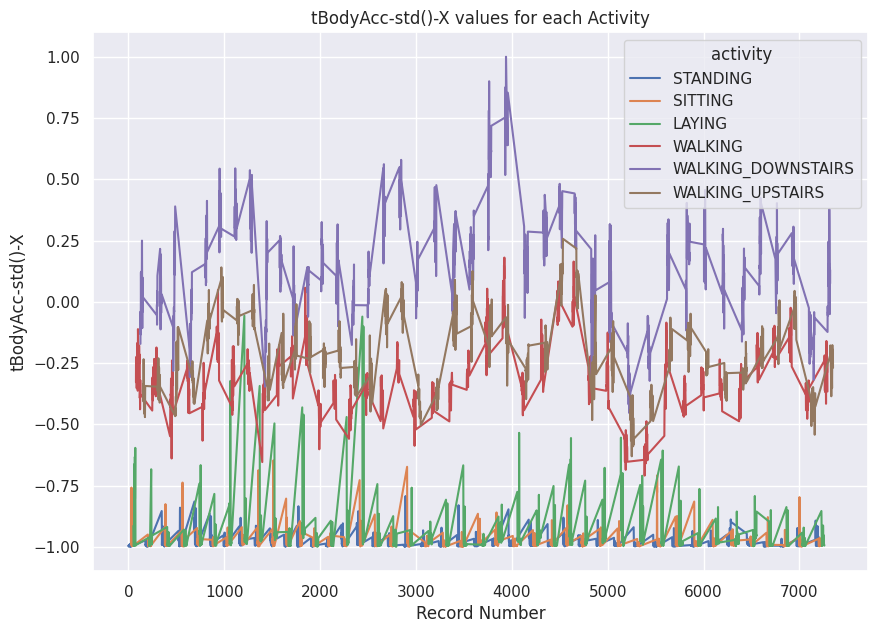

In [19]:
plt.figure(figsize=(10, 7))
plt.title("tBodyAcc-std()-X values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyAcc-std()-X",
             hue="activity")


plt.show()

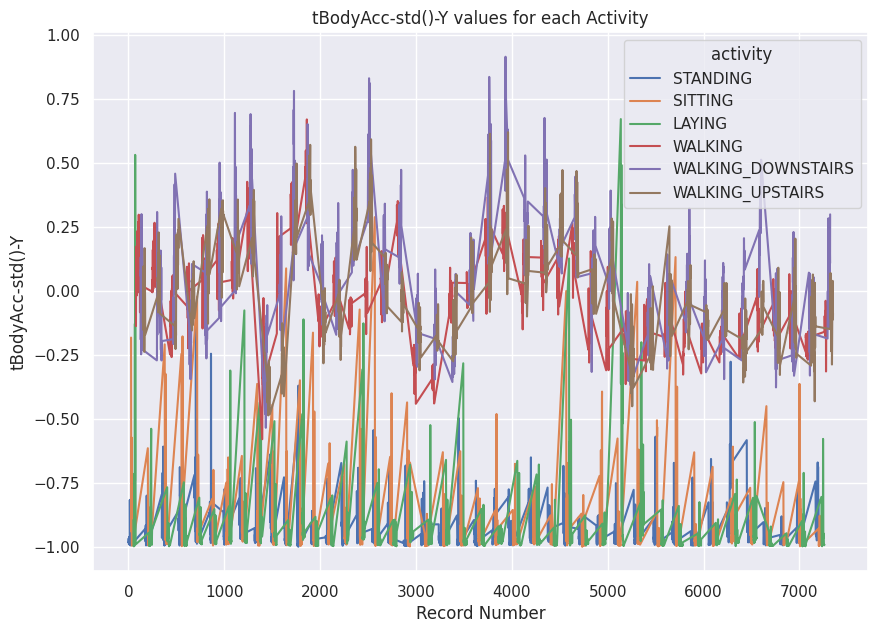

In [20]:
plt.figure(figsize=(10, 7))
plt.title("tBodyAcc-std()-Y values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyAcc-std()-Y",
             hue="activity")


plt.show()

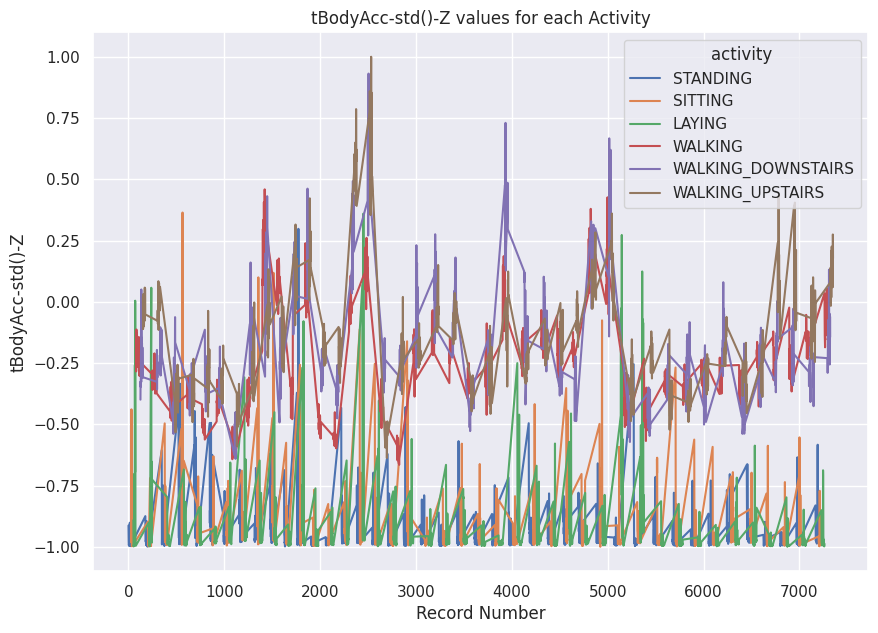

In [21]:
plt.figure(figsize=(10, 7))
plt.title("tBodyAcc-std()-Z values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyAcc-std()-Z",
             hue="activity")


plt.show()

In [22]:
plt.figure(figsize=(10, 7))
plt.title("tBodyGyro-std()-X values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyGyro-std()-X",
             hue="activity")


plt.show()

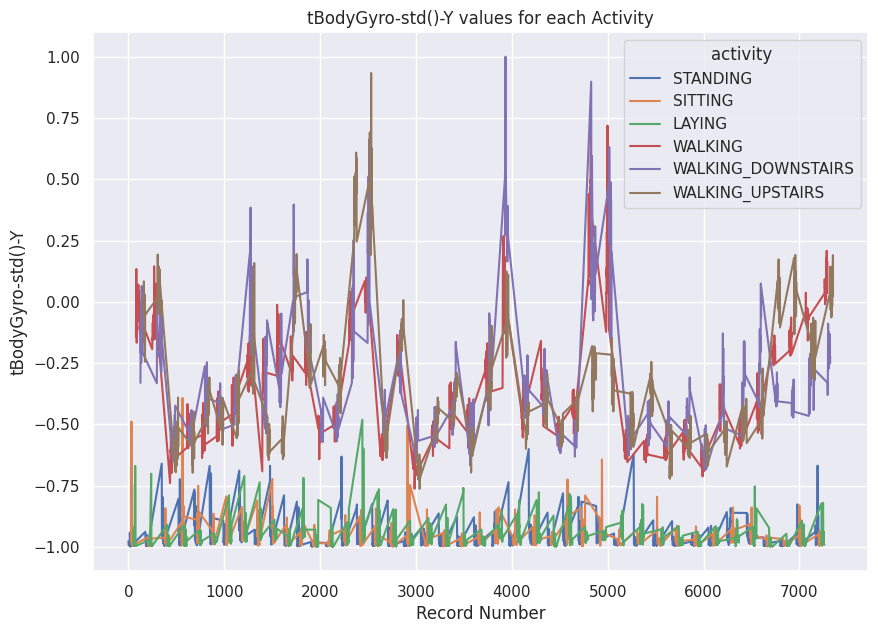

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("tBodyGyro-std()-Y values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyGyro-std()-Y",
             hue="activity")


plt.show()

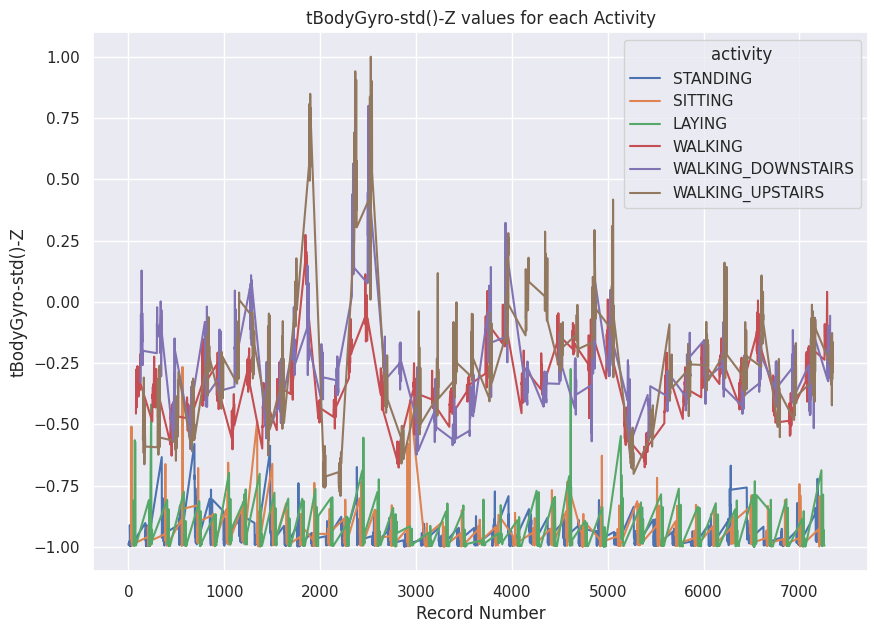

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("tBodyGyro-std()-Z values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyGyro-std()-Z",
             hue="activity")


plt.show()

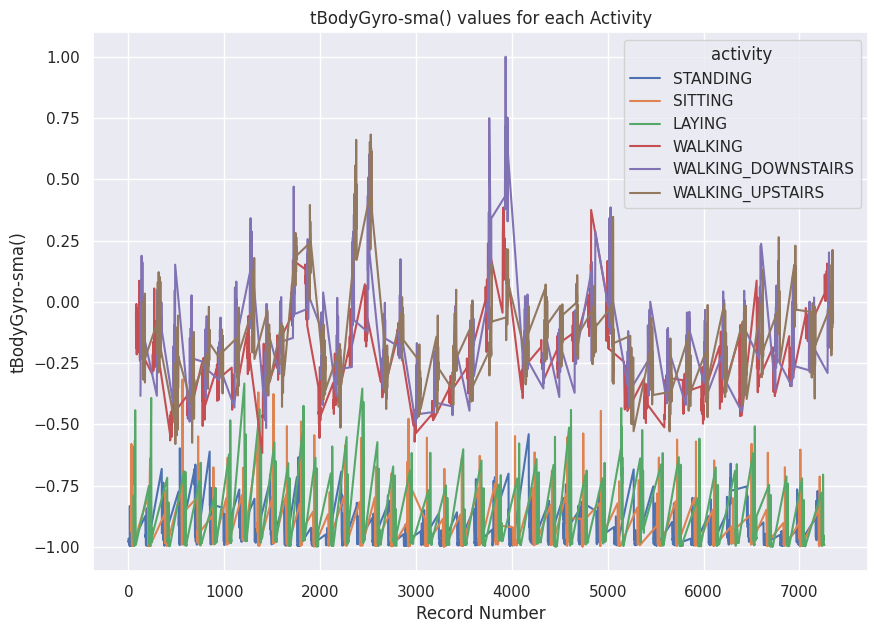

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("tBodyGyro-sma() values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyGyro-sma()",
             hue="activity")
plt.show()

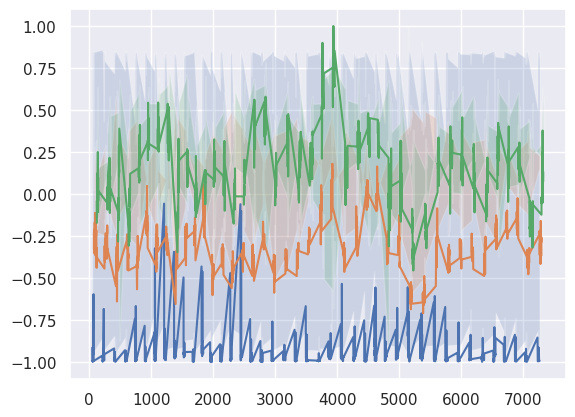

In [ ]:
# plot each column
# fig, axs = plt.subplots(figsize=(25, 7))

for activity in har_data["activity"].unique()[2:5]:
    plt.plot( 
            har_data[har_data["activity"] == activity].index, 
            har_data[har_data["activity"] == activity]["tBodyAcc-std()-X"])
    
    plt.fill_between(x=har_data[har_data["activity"] == activity].index, 
                    y1=har_data[har_data["activity"] == activity]["tBodyAcc-min()-X"], 
                    y2=har_data[har_data["activity"] == activity]["tBodyAcc-max()-X"], 
                    alpha=0.2)
    # axs.legend(df.columns)
    # axs.plot(df.xs('std', level=1)[col])
# plt.legend()
plt.show()

In [ ]:
for col in har_data.columns[har_data.columns.str.contains('t.*std.*' )]:
    temp = har_data["tBodyAcc-std()-X"]


In [ ]:
har_data["activity"].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
(
    body_gyro_z
    .groupby('activity')
    .agg(['min', 'max', 'std'], numeric_only=True)
    .transpose()
    .unstack()
    # .pipe(sns.lineplot, xs.index, xs.values, hue=xs.columns)
    # .xs("std", level=1)
    # .unstack()
)
# df.xs('min', level=1)
# sns.lineplot(data=df, x=df.xs(0), y=df.columns, hue='region')

activity    LAYING                       SITTING                      \
               min       max       std       min       max       std   
0        -0.670295  0.799795  0.106954 -0.507726  0.606790  0.089694   
1        -0.585100  0.881675  0.109017 -0.503307  0.481026  0.088011   
2        -0.465700  0.946973  0.111529 -0.531912  0.482221  0.087905   
3        -0.469933  0.817699  0.109207 -0.542438  0.377916  0.087228   
4        -0.470358  0.594251  0.104946 -0.526001  0.411676  0.086551   
..             ...       ...       ...       ...       ...       ...   
123      -0.501555  0.333352  0.046240 -1.020795  0.552103  0.054269   
124      -0.480576  0.375095  0.045852 -1.055446  0.590943  0.055144   
125      -0.486198  0.447170  0.046977 -1.031309  0.637963  0.056531   
126      -0.489518  0.390168  0.046943 -1.035528  0.623411  0.058525   
127      -0.503370  0.389176  0.046625 -1.069563  0.628543  0.059177   

activity  STANDING                       WALKING                      \
               min       max       std       min       max       std   
0        -1.077288  0.235221  0.058009 -1.308632  1.179825  0.337408   
1        -1.329607  0.252968  0.062483 -1.423102  1.205054  0.336485   
2        -1.062866  0.290726  0.057533 -1.369368  1.434532  0.334449   
3        -1.241965  0.298941  0.057085 -1.286720  1.342110  0.327848   
4        -1.098532  0.257320  0.055776 -1.307685  1.075259  0.331576   
..             ...       ...       ...       ...       ...       ...   
123      -0.215038  0.276807  0.031335 -1.276177  1.217776  0.343507   
124      -0.298239  0.248250  0.031598 -1.460163  1.257305  0.336130   
125      -0.282451  0.310450  0.032264 -1.589741  1.414230  0.334110   
126      -0.278247  0.360021  0.032890 -1.313873  1.441197  0.337537   
127      -0.301784  0.404205  0.033552 -1.176636  1.220344  0.339098   

activity WALKING_DOWNSTAIRS                     WALKING_UPSTAIRS            \
                        min       max       std              min       max   
0                 -1.476881  1.356020  0.370518        -2.216418  1.671485   
1                 -1.528926  1.557924  0.368962        -2.167794  1.819116   
2                 -1.272198  1.113072  0.362644        -2.036561  1.967763   
3                 -1.532294  1.563743  0.364934        -1.885443  1.807103   
4                 -1.729513  1.800632  0.372947        -1.856467  1.418927   
..                      ...       ...       ...              ...       ...   
123               -1.844006  1.348720  0.373171        -1.766066  1.581341   
124               -1.571839  1.747755  0.382095        -1.826266  1.614938   
125               -1.811177  1.153280  0.387732        -1.854686  1.470271   
126               -1.625237  1.607418  0.389838        -2.036767  1.341806   
127               -1.660406  1.898607  0.381888        -2.192251  1.440078   

activity            
               std  
0         0.415231  
1         0.422282  
2         0.426711  
3         0.422376  
4         0.413155  
..             ...  
123       0.408100  
124       0.406336  
125       0.410997  
126       0.423919  
127       0.425380  

[128 rows x 18 columns]

In [ ]:
(
    har_data["tBodyAcc-std()-X"]
    # .plot()
)

0      -0.995279
1      -0.998245
2      -0.995380
3      -0.996091
4      -0.998139
          ...   
7347   -0.195387
7348   -0.235309
7349   -0.218218
7350   -0.219139
7351   -0.269270
Name: tBodyAcc-std()-X, Length: 7352, dtype: float64

In [ ]:
MinMaxScaler(feature_range=(-1,1)).fit_transform((
    body_acc_x
    .drop("activity", axis=1)
    .aggregate('mean', axis=1)
    .values
    .reshape(-1, 1)
    # .pivot()
    # .apply(MinMaxScaler().fit_transform)
    # .transpose()
    # .groupby()
    # .std(axis=1)
    # .plot()
))

NameError: name 'MinMaxScaler' is not defined

In [94]:
(
    body_acc_x
    .drop(columns=["activity"])
    .apply(lambda x: np.std(x), axis=1)
    # .transpose()
    # .groupby()
    # .std()
) 

0       0.002941
1       0.001981
2       0.002908
3       0.002678
4       0.002015
          ...   
7347    0.261811
7348    0.248891
7349    0.254422
7350    0.254124
7351    0.237900
Length: 7352, dtype: float64